In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
eval_May04_1439_22447097.log

Haven't read it yet but might be useful: https://arxiv.org/pdf/1904.06979.pdf

Using Welch's t-test for now
TODO: confirm if it's right

In [2]:
episode_rewards = np.asarray([-0.77648341, -0.77648341,  0.        , -0.84545385, -0.60473464,
       -0.60473464,  0.        , -0.62770281, -0.83607652, -0.83607652,
        0.        , -0.81167945, -0.50230277, -0.50230277,  0.        ,
       -0.50768057, -0.37690899, -0.37690899,  0.        , -0.37139904,
       -0.76003052, -0.76003052,  0.        , -0.71406728, -0.63670099,
       -0.63670099,  0.        , -0.62312957, -0.58986421, -0.58986421,
        0.        , -0.65778797, -0.15371678, -0.15371678,  0.        ,
       -0.17047249, -0.74463809, -0.74463809,  0.        , -0.72543085,
       -0.32895744, -0.32895744,  0.        , -0.36301456, -0.78510779,
       -0.78510779,  0.        , -0.82559714])

In [17]:
eps = int(len(episode_rewards)/4)

In [95]:
sample1 = episode_rewards.reshape((eps,4)).sum(axis=1)

In [96]:
sample2 = episode_rewards.reshape((eps,4)).sum(axis=1)

In [ ]:
# Hypothesis
# Null Hypothesis is that reward from a model trained on one strategy is performs the same on the other strategy that it was not trained on
# H0: μ1 = μ2
# Alternate Hypothesis is that reward is the same, i.e. strategy didn't have any effect on training
# Ha: μ2 ≠ μ1

In [97]:
s, p = scipy.stats.ttest_ind(
    sample1,
    sample2, 
    equal_var=False # Not sure
)

In [98]:
s,p

(0.0, 1.0)

In [33]:
strats = ["evasive", "hiding", "shifty"]

In [60]:
reward_dict = {s: {s: None for s in strats} for s in strats}


In [81]:
stats = {}
for model_strat in strats:
    for s1_player_strat in strats:
            for s2_player_strat in strats:
                sample1 = reward_dict[model_strat][s1_player_strat]
                sample2 = reward_dict[model_strat][s2_player_strat]
                stats.update({f"m{model_strat[0]}p{s1_player_strat[0]}_vs_m{model_strat[0]}p{s2_player_strat[0]}": None})
stats

{'mepe_vs_mepe': None,
 'mepe_vs_meph': None,
 'mepe_vs_meps': None,
 'meph_vs_mepe': None,
 'meph_vs_meph': None,
 'meph_vs_meps': None,
 'meps_vs_mepe': None,
 'meps_vs_meph': None,
 'meps_vs_meps': None,
 'mhpe_vs_mhpe': None,
 'mhpe_vs_mhph': None,
 'mhpe_vs_mhps': None,
 'mhph_vs_mhpe': None,
 'mhph_vs_mhph': None,
 'mhph_vs_mhps': None,
 'mhps_vs_mhpe': None,
 'mhps_vs_mhph': None,
 'mhps_vs_mhps': None,
 'mspe_vs_mspe': None,
 'mspe_vs_msph': None,
 'mspe_vs_msps': None,
 'msph_vs_mspe': None,
 'msph_vs_msph': None,
 'msph_vs_msps': None,
 'msps_vs_mspe': None,
 'msps_vs_msph': None,
 'msps_vs_msps': None}

In [11]:
for k1,v1 in aa.items():
    for k2,v2 in v1.items():
        # print(v2)
        print(k2, np.asarray(v2).flatten().shape)

random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (0,)
evasive (0,)
hiding (0,)
shifty (0,)
multiple (0,)


# Debugging t-test

In [9]:
import json
with open("../logs/long_time/eval_May04_1439_22447097.log_rewards.json") as f:
    reward_dict = json.load(f)

In [10]:
from pprint import pprint

results_stats = {}
data_arrays = {}
for model_strat in reward_dict:
    data_arrays[model_strat] = {}
    for test_strat in reward_dict[model_strat]:
        if len(reward_dict[model_strat][test_strat]) == 0:
            continue
        scores = np.array(reward_dict[model_strat][test_strat]).flatten()
        data_arrays[model_strat][test_strat] = scores
        results_stats[model_strat + "_vs_" + test_strat] = (np.mean(scores), np.std(scores))
        #print(model_strat + "_vs_" + test_strat, results_stats[model_strat + "_vs_" + test_strat])
    #print("\n")
pprint(results_stats)

{'evasive_vs_evasive': (-0.41086416260611186, 0.19229860958721331),
 'evasive_vs_hiding': (-0.3692894949023118, 0.22386257458008788),
 'evasive_vs_random': (-0.2957878764851409, 0.273800511066083),
 'evasive_vs_shifty': (-0.45177211782148363, 0.26031875035358615),
 'hiding_vs_evasive': (-0.4645661978531539, 0.16282289645635403),
 'hiding_vs_hiding': (-0.3701947122841769, 0.20008804703622135),
 'hiding_vs_random': (-0.3558411335325471, 0.19564857757100398),
 'hiding_vs_shifty': (-0.4079459592717933, 0.11919331789067626),
 'multiple_vs_evasive': (-0.34115376800099056, 0.15297566790341247),
 'multiple_vs_hiding': (-0.2785054455034314, 0.1667038993277465),
 'multiple_vs_random': (-0.19016186806195076, 0.29670906586873846),
 'multiple_vs_shifty': (-0.3754085994332058, 0.2147785744057501),
 'random_vs_evasive': (-0.32392660628637066, 0.07327146694035166),
 'random_vs_hiding': (-0.2076005347795208, 0.10093536801212873),
 'random_vs_random': (0.03618652996191327, 0.2910334125867575),
 'random_

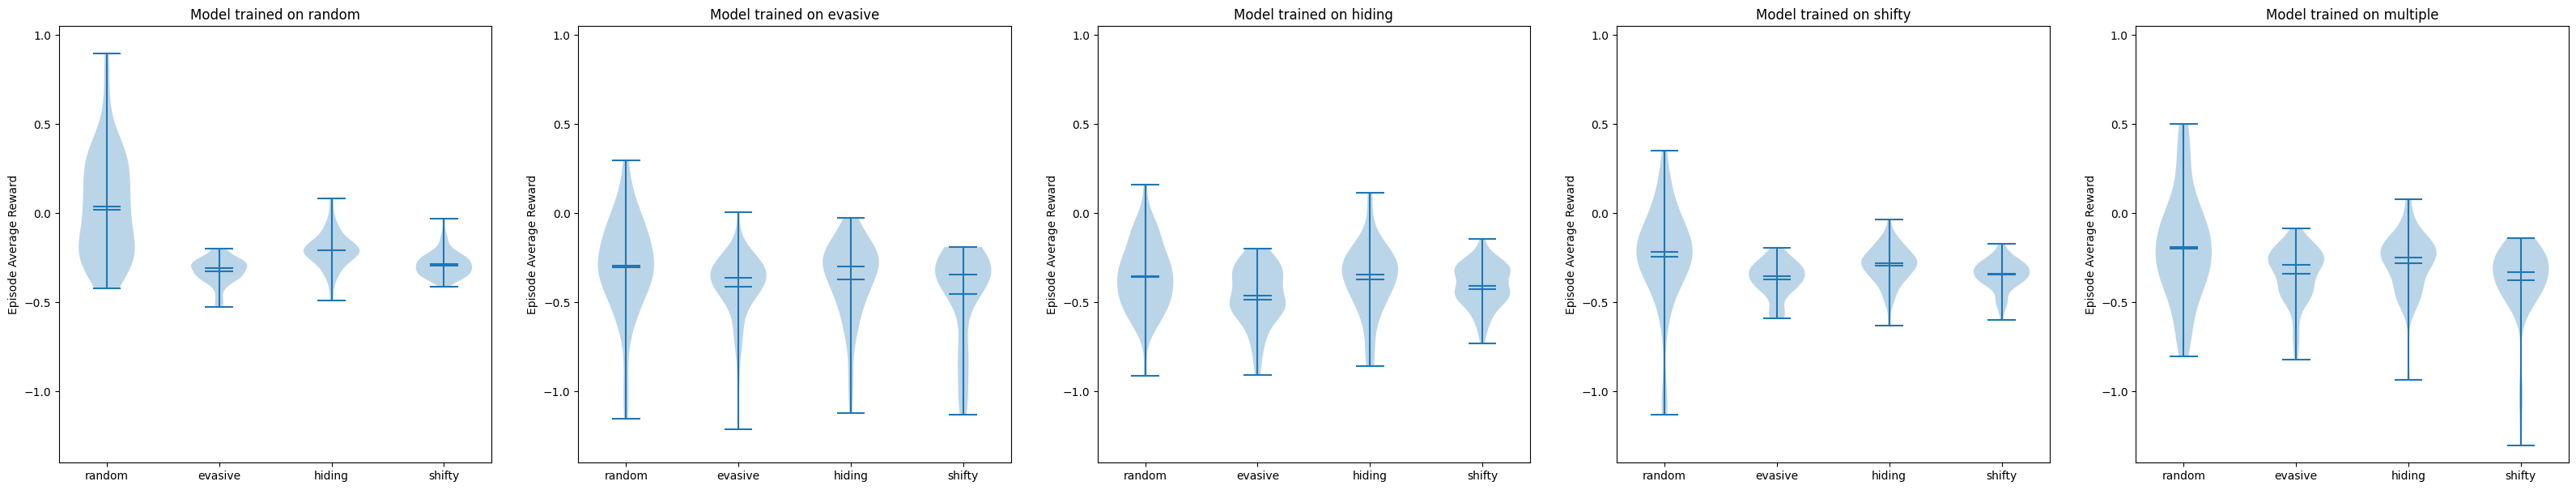

In [11]:


fig, axs = plt.subplots(nrows=1, ncols=len(data_arrays), figsize=(40, 7))
axid = 0
for model_strat in data_arrays:
    data = [data_arrays[model_strat][test_strat] for test_strat in data_arrays[model_strat]]
    #print(data.shape)
    if len(data) == 0:
        continue
    axs[axid].violinplot(data, showmeans=True, showextrema=True, showmedians=True)
    axs[axid].set_title("Model trained on " + model_strat)
    axs[axid].set_xticks(np.arange(1, len(data_arrays[model_strat]) + 1), labels=data_arrays[model_strat].keys())
    axs[axid].set_ylim(-1.4, 1.05)
    axs[axid].set_ylabel('Episode Average Reward')
    axid+=1

plt.savefig("crosstest_rewards.svg")
plt.show()

# Single Episode rewards, playtime test

In [7]:
import json
with open("../logs/ad_train_May03_1041_58852732_singlep_rewards.log.json") as f:
    ser_list = json.load(f)

by_strat = {}
for strat in ["evasive", "hiding", "shifty", "random"]:
    by_strat[strat] = []
    for el in ser_list:
        if strat in el:
            by_strat[strat].append(el[strat])
    by_strat[strat] = np.array(by_strat[strat])

#print(by_strat)

In [ ]:
fig, axs = plt.subplots(nrows=len(by_strat), ncols=1, figsize=(7, 30))
axid = 0
for strat in by_strat:
    axs[axid].
    axs[axid].set_title("Model trained on " + model_strat)
    axid += 1